### TODO : Build a multiple linear regression model for the prediction of demand for shared bikes

In [782]:
#Importing Libraries
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import numpy as np

In [783]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## 1 Importing Data

In [784]:
df = pd.read_csv('day.csv')

In [785]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.1 Checking the shape of dataframe 

In [786]:
df.shape

(730, 16)

In [787]:
#Columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [788]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [789]:
df.drop_duplicates(subset=None, inplace=True)
df.shape

(730, 16)

- There are no outliers and duplicates
- There are 730 rows and 16 columns

### 1.2 Checking Missing Values

In [790]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [791]:
## instant column contains unique id
df['instant'].nunique()
df.set_index('instant', inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.3 Removing un-neccesary columns

In [792]:
casualandregistered = df['casual']+df['registered']
(df['cnt'] == casualandregistered).sum()

730

- as cnt value is sum of casual and registered and our objective is to find the total
- count of bikes and not by specific category, we will ignore these two columns.

In [793]:
#we dont need dteday
df.drop(['dteday','registered','casual'],inplace=True,axis=1)

In [794]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 1.4 Encoding Categorical columns

In [795]:
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df[['season','weathersit']] = df[['season','weathersit']].astype(str)
# Converting the seasons column as per readme
df['season'].replace(['1','2','3','4'],['spring', 'summer', 'fall', 'winter'], inplace=True)
# Converting the weather column as per readme
df['weathersit'].replace(['1','2','3','4'],['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], inplace=True)
# Converting the weekdays column as per readme
df['weekday'].replace([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], inplace=True)

## 2 EDA

### 2.1 Categorical distribution

<AxesSubplot:ylabel='season'>

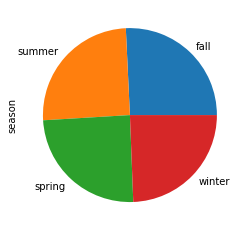

In [796]:
df['season'].value_counts().plot.pie()

- All seasons have almost equal counts

<AxesSubplot:ylabel='mnth'>

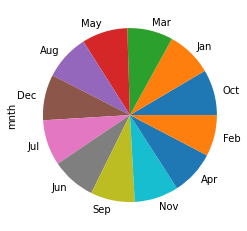

In [797]:
df['mnth'].value_counts(normalize=True).plot.pie()

<AxesSubplot:ylabel='weathersit'>

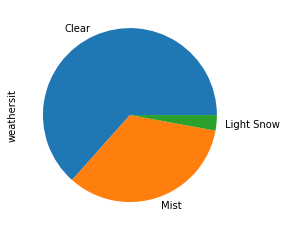

In [798]:
df['weathersit'].value_counts(normalize=True).plot.pie()

- People like to travel in clear sky

<AxesSubplot:ylabel='weekday'>

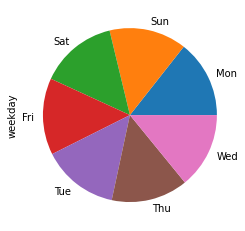

In [799]:
df['weekday'].value_counts(normalize=True).plot.pie()

In [800]:
# Checking the % of null values in each column
round(df.isnull().sum()/len(df.index)*100,2)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

### 2.2 Comparing Yearwise Categorical data

In [801]:
def categorical_statistics(col):
    cat_df = df.groupby(col)['cnt'].agg(['count','sum', 'mean']).sort_values('sum',ascending = False)
    cat_df['sum_perctage']=cat_df['sum']/df.cnt.sum()*100
    cat_df['count_perctage']=cat_df['count']/df.cnt.count()*100
    return round(cat_df,3)

def categorical_plots(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=df, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])

In [802]:
categorical_statistics('weekday')

,count,sum,mean,sum_perctage,count_perctage
weekday,,,,,
Fri,104,487790,4690.288,14.823,14.247
Thu,104,485395,4667.260,14.750,14.247
Sat,105,477807,4550.543,14.519,14.384
Wed,103,471214,4574.893,14.319,14.110
Tue,104,469109,4510.663,14.255,14.247
Mon,105,455503,4338.124,13.842,14.384
Sun,105,444027,4228.829,13.493,14.384


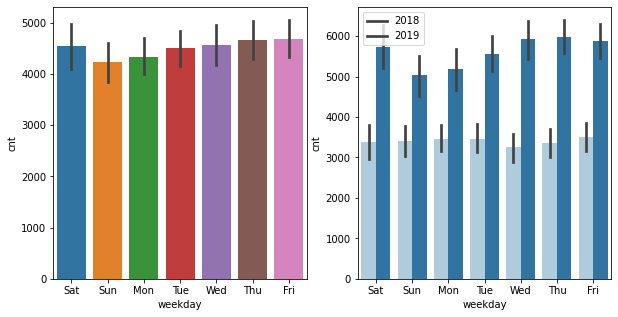

In [803]:
categorical_plots('weekday',10,5)

- weekday column show similar trend so we will see if we need to include this column or not

In [804]:
categorical_statistics('yr')


,count,sum,mean,sum_perctage,count_perctage
yr,,,,,
1,365,2047742,5610.252,62.225,50.0
0,365,1243103,3405.762,37.775,50.0


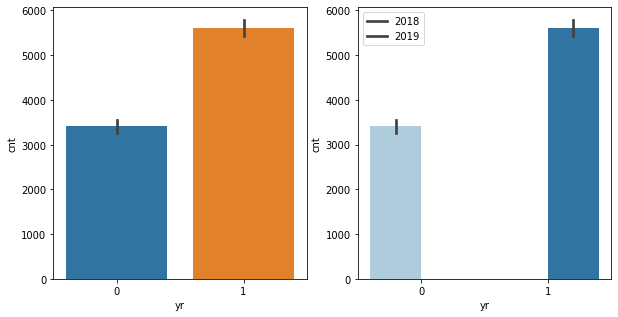

In [805]:
categorical_plots('yr',10,5)

- Clearly bike rental demand is increased in 2019

In [806]:
categorical_statistics('workingday')


,count,sum,mean,sum_perctage,count_perctage
workingday,,,,,
1,499,2290576,4590.333,69.604,68.356
0,231,1000269,4330.169,30.396,31.644


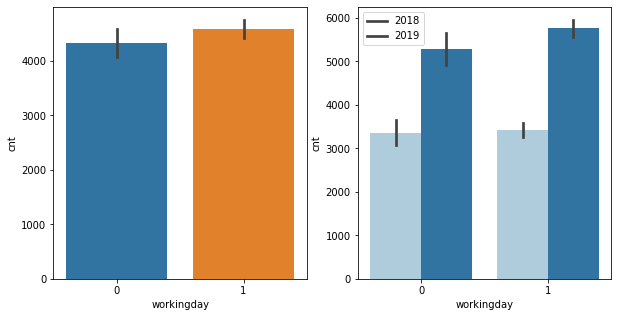

In [807]:
categorical_plots('workingday',10,5)

- Demand for bike rental is more on working days as employee might be using rental bikes

In [808]:
categorical_statistics('holiday')


,count,sum,mean,sum_perctage,count_perctage
holiday,,,,,
0,709,3212410,4530.903,97.617,97.123
1,21,78435,3735.000,2.383,2.877


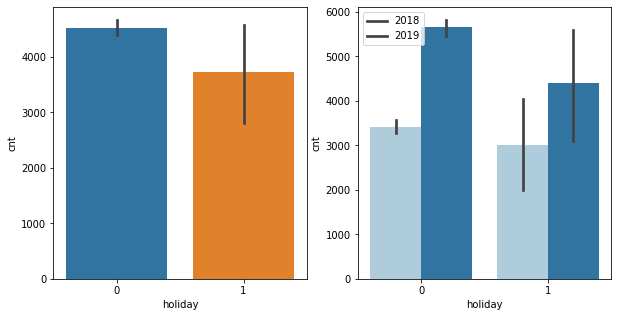

In [809]:
categorical_plots('holiday',10,5)

- Most of the booking are on working day

        count      sum      mean  sum_perctage  count_perctage
season                                                        
fall      188  1061129  5644.303        32.245          25.753
summer    184   918589  4992.332        27.913          25.205
winter    178   841613  4728.163        25.574          24.384
spring    180   469514  2608.411        14.267          24.658


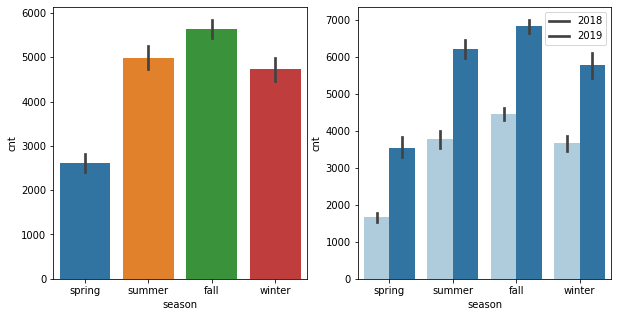

In [810]:
print(categorical_statistics('season'))
categorical_plots('season',10,5)

- There is increase in demand in fall months as most of people join companies and use shared bikes

      count     sum      mean  sum_perctage  count_perctage
mnth                                                       
Aug      62  351194  5664.419        10.672           8.493
Jun      60  346342  5772.367        10.524           8.219
Sep      60  345991  5766.517        10.514           8.219
Jul      62  344948  5563.677        10.482           8.493
May      62  331686  5349.774        10.079           8.493
Oct      62  322352  5199.226         9.795           8.493
Apr      60  269094  4484.900         8.177           8.219
Nov      60  254831  4247.183         7.744           8.219
Mar      62  228920  3692.258         6.956           8.493
Dec      62  211036  3403.806         6.413           8.493
Feb      56  149518  2669.964         4.543           7.671
Jan      62  134933  2176.339         4.100           8.493


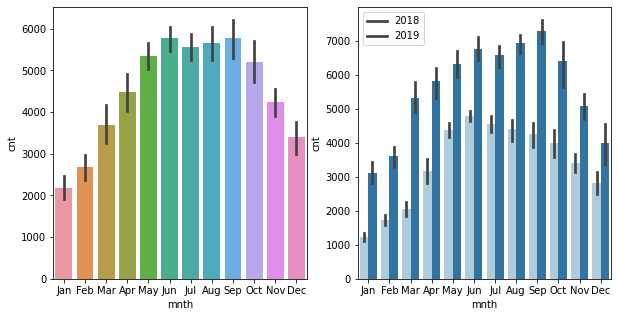

In [811]:
print(categorical_statistics('mnth'))
categorical_plots('mnth',10,5)

            count      sum      mean  sum_perctage  count_perctage
weathersit                                                        
Clear         463  2257952  4876.786        68.613          63.425
Mist          246   995024  4044.813        30.236          33.699
Light Snow     21    37869  1803.286         1.151           2.877


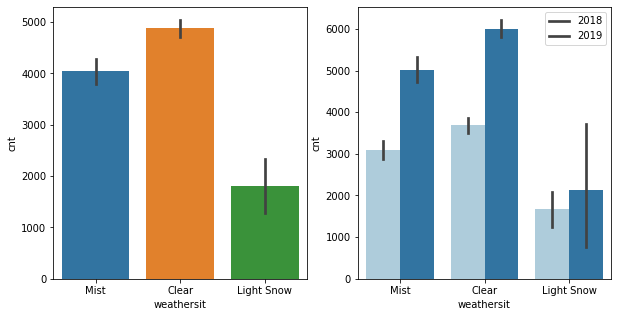

In [812]:
print(categorical_statistics('weathersit'))
categorical_plots('weathersit',10,5)

- People love to drive in clear weather

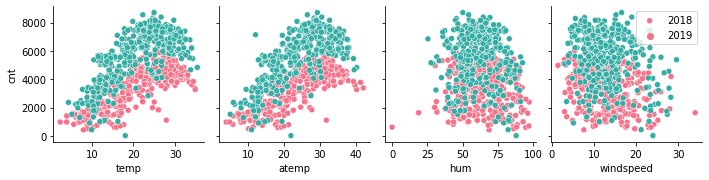

In [813]:
# Checking linear relationship between the cnt variable and other numeric variables
x =sns.pairplot(df, palette='husl', x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , hue='yr',diag_kind=None )
x._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

### 2.3 Visualising Categorical Variables



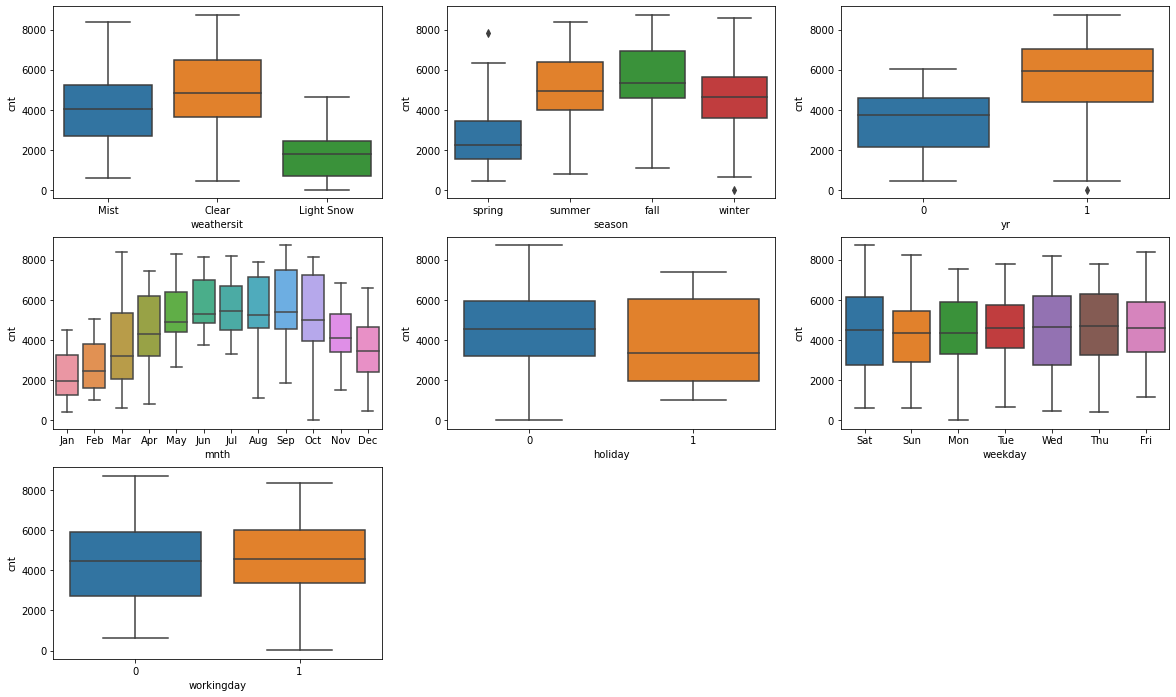

In [814]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

<span style="color:blue">

- Count rised in an year
- mostly clear weather has higher contribution
- Demand of users increases over weekend.
- Number of users increased from June to September.
- Number of users increased in Fall.
</span>


#### Total rentals on different days of the week.

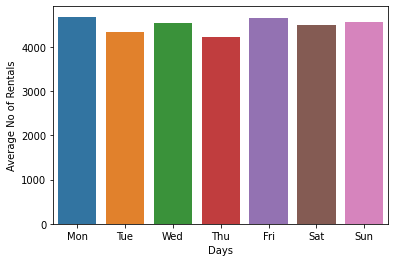

In [815]:
weekday_df = df.groupby(['weekday'])['cnt'].mean().reset_index()
sns.barplot(x='weekday', y='cnt', data=weekday_df)
plt.xticks(np.arange(7),('Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('Days')
plt.ylabel('Average No of Rentals')
plt.show()

#### Checking business on Working days

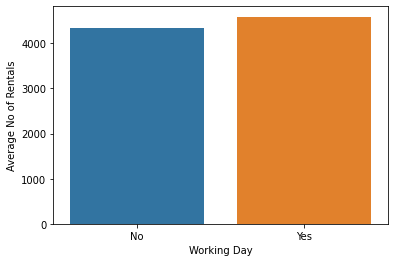

In [816]:
workingday_df = df.groupby(['workingday'])['cnt'].mean().reset_index()
sns.barplot(x='workingday', y='cnt', data=workingday_df)
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Working Day')
plt.ylabel('Average No of Rentals')
plt.show()

### 2.4 Creating Dummy Variables for Categorical Data


In [817]:
dummies = pd.get_dummies(df[['season','mnth','weekday','weathersit']], drop_first=True)
dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [818]:
df = pd.concat([df,dummies], axis=1)  
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


### 2.5 Visualising the Numerical Data

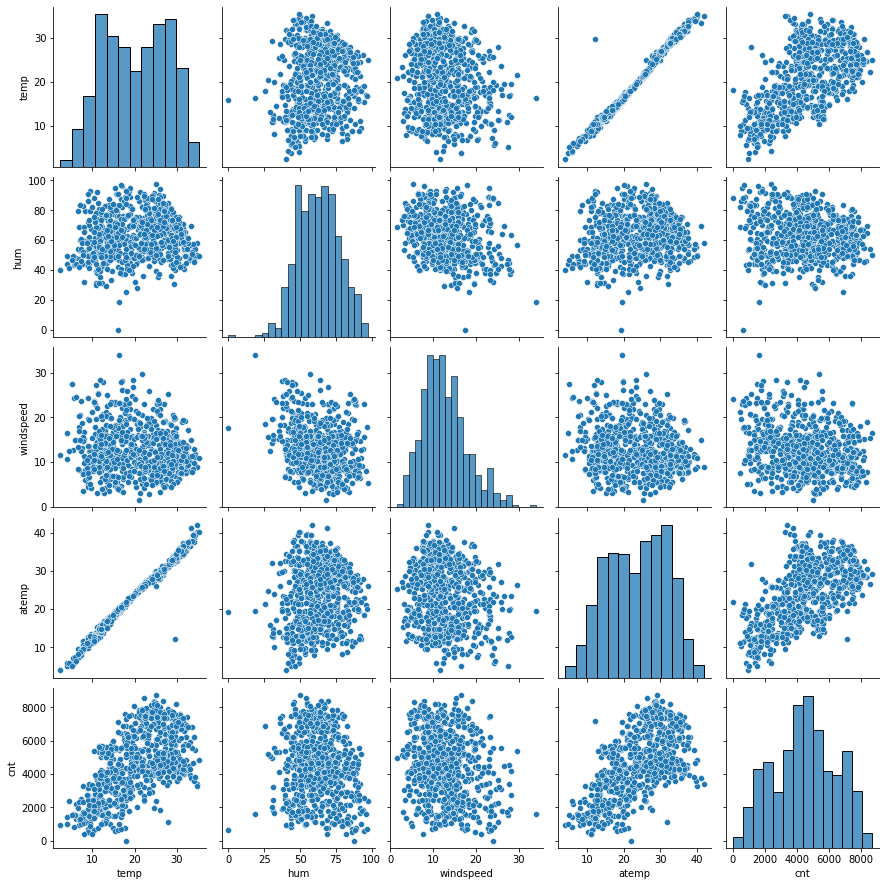

In [819]:
#Pairplot for numeric variables
df_num = df[["temp", "hum",'windspeed','atemp','cnt']]
sns.pairplot(df_num)
plt.show()

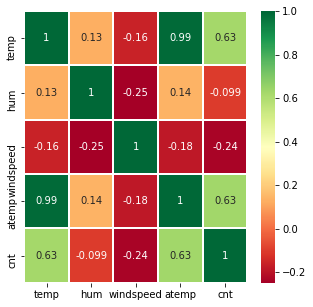

In [820]:
plt.figure(figsize = (5,5))
ax= sns.heatmap(df_num.corr(), annot = True, cmap="RdYlGn",linewidth = 1)

- atemp and temp are highly correleated

In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 30 columns):
yr                       730 non-null int64
holiday                  730 non-null int64
workingday               730 non-null int64
temp                     730 non-null float64
atemp                    730 non-null float64
hum                      730 non-null float64
windspeed                730 non-null float64
cnt                      730 non-null int64
season_spring            730 non-null uint8
season_summer            730 non-null uint8
season_winter            730 non-null uint8
mnth_Aug                 730 non-null uint8
mnth_Dec                 730 non-null uint8
mnth_Feb                 730 non-null uint8
mnth_Jan                 730 non-null uint8
mnth_Jul                 730 non-null uint8
mnth_Jun                 730 non-null uint8
mnth_Mar                 730 non-null uint8
mnth_May                 730 non-null uint8
mnth_Nov                 730 non-null uint8
mnth_Oc

### 3 Splitting the Data into Training and Testing Sets

In [822]:
from sklearn.model_selection import train_test_split
import numpy as np

In [823]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [824]:
print('Shape of the Train Data is:' , df_train.shape)
print('Shape of the Test Data is:' , df_test.shape)

Shape of the Train Data is: (510, 30)
Shape of the Test Data is: (219, 30)


### 3.1 Rescaling the Features 



In [825]:
from sklearn.preprocessing import MinMaxScaler

In [826]:
scaler = MinMaxScaler()

In [827]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [828]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['cnt','temp','atemp','hum','windspeed',]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [829]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [830]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


### 3.2 Correlation Matrix

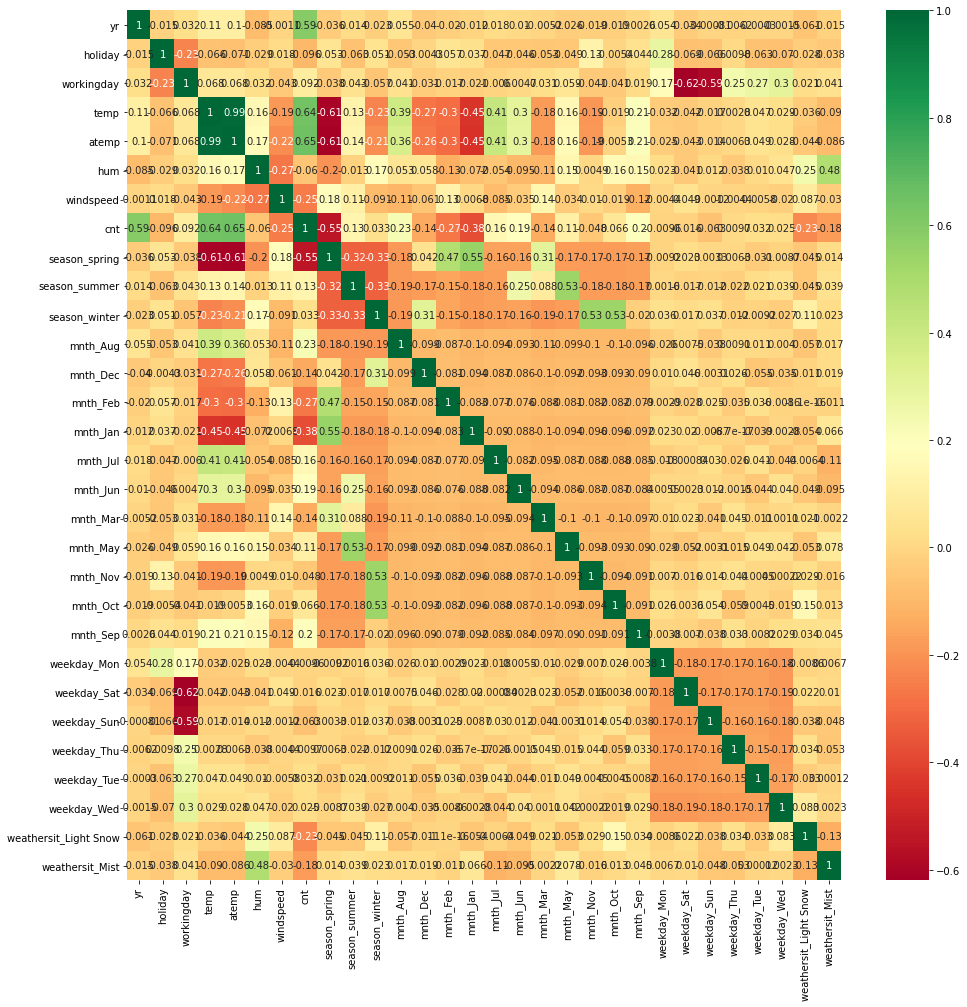

In [831]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

- temp and atemp has very high correlation value of 0.99.
- spring season is - corr with cnt.
- months and corresponding season has correlation
- atemp and yr has strong correlation with cnt

As you might have noticed, `atemp` seems to the correlated to `cnt` the most. Let's see a pairplot for `atemp` vs `cnt`.

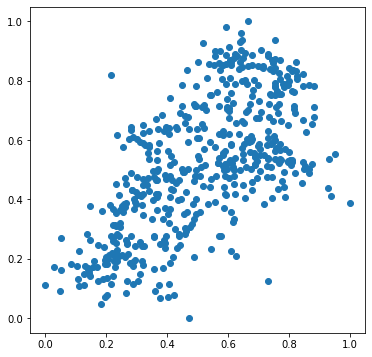

In [832]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### 3.3 Dividing into X and Y sets for the model building


In [833]:
y_train = df_train.pop('cnt')
X_train = df_train

### 4 Building a linear model



In [834]:
import statsmodels.api as sm

In [835]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [836]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

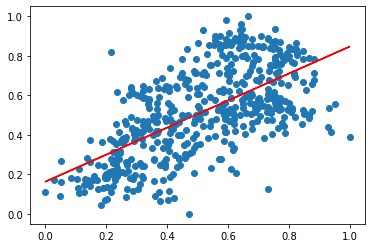

In [837]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.162924 + 0.683633*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [838]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           1.10e-61
Time:                        23:03:40   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

### Adding another variable

The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [839]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp','yr']]

In [840]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [841]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.07e-131
Time:                        23:03:40   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

The R-squared value obtained is `0.696`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `mnth_Aug`.

In [842]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp','yr','mnth_Aug']]

In [843]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const       0.069995
atemp       0.631624
yr          0.237949
mnth_Aug   -0.012830
dtype: float64

In [844]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     386.0
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          2.36e-130
Time:                        23:03:40   Log-Likelihood:                 342.08
No. Observations:                 510   AIC:                            -676.2
Df Residuals:                     506   BIC:                            -659.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0700      0.015      4.559      0.0

- as P value is very high we will ignore it

In [845]:
X_train_lm = X_train[['atemp','yr','mnth_Sep']]

In [846]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const       0.075548
atemp       0.607287
yr          0.238517
mnth_Sep    0.067310
dtype: float64

In [847]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     397.4
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.38e-132
Time:                        23:03:40   Log-Likelihood:                 347.26
No. Observations:                 510   AIC:                            -686.5
Df Residuals:                     506   BIC:                            -669.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0755      0.015      5.076      0.0

The R-squared value obtained is `0.702`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `mnth_Jun`.

In [848]:
X_train_lm = X_train[['atemp','yr','mnth_Sep','mnth_Jun']]

In [849]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const       0.077733
atemp       0.599639
yr          0.238748
mnth_Sep    0.070061
mnth_Jun    0.018788
dtype: float64

In [850]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     298.1
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          2.08e-131
Time:                        23:03:40   Log-Likelihood:                 347.63
No. Observations:                 510   AIC:                            -685.3
Df Residuals:                     505   BIC:                            -664.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0777      0.015      5.146      0.0

- as P value of mnth JUN is very high we will ignore it 

In [851]:
X_train_lm = X_train[['atemp','yr','mnth_Sep','mnth_Jul']]

In [852]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const       0.059991
atemp       0.653361
yr          0.237271
mnth_Sep    0.053054
mnth_Jul   -0.082374
dtype: float64

In [853]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     308.6
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          4.26e-134
Time:                        23:03:40   Log-Likelihood:                 353.89
No. Observations:                 510   AIC:                            -697.8
Df Residuals:                     505   BIC:                            -676.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0600      0.015      3.918      0.0

The R-squared value obtained is `0.710`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `windspeed`.

In [854]:
X_train_lm = X_train[['atemp','yr','mnth_Sep','mnth_Jul','windspeed']]

In [855]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.127788
atemp        0.627110
yr           0.238394
mnth_Sep     0.044343
mnth_Jul    -0.083837
windspeed   -0.168624
dtype: float64

In [856]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     265.8
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          9.01e-139
Time:                        23:03:41   Log-Likelihood:                 367.78
No. Observations:                 510   AIC:                            -723.6
Df Residuals:                     504   BIC:                            -698.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1278      0.020      6.509      0.0

The R-squared value obtained is `0.725`. 

In [857]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [858]:
def VIF(X_train_lm):
    vif = pd.DataFrame()
    vif['Features'] = X_train_lm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    

In [859]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF(X_train_lm)

    Features    VIF
0      const  14.03
1      atemp   1.34
4   mnth_Jul   1.24
3   mnth_Sep   1.09
5  windspeed   1.06
2         yr   1.01


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [860]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

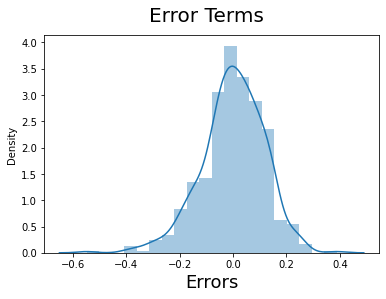

In [861]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [862]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [863]:
num_vars = ['cnt','temp','atemp','hum','windspeed',]
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [864]:
y_test = df_test.pop('cnt')
X_test = df_test

In [865]:
X_test_m1 = sm.add_constant(X_test)
X_test_m1 = X_test_m1[['atemp','const','mnth_Jul','mnth_Sep','windspeed','yr']]
y_pred_m1 = lr.predict(X_test_m1)

Text(0, 0.5, 'y_pred')

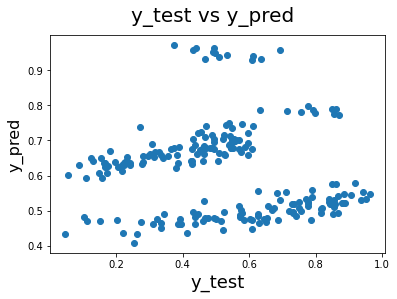

In [866]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [867]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m1)

-0.6194574844492484

### Now solving using RFE

In [868]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [869]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 10),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 6),
 ('weekday_Tue', False, 5),
 ('weekday_Wed', False, 7),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [870]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_lm1 = sm.add_constant(X_train_rfe)
lr_rfe = sm.OLS(y_train, X_train_lm1).fit()
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.59e-189
Time:                        23:03:42   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [871]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF(X_train_rfe)

                 Features    VIF
2              workingday  60.93
16            weekday_Sat  14.59
17            weekday_Sun  13.91
6           season_spring   5.79
3                    temp   4.88
8           season_winter   3.88
7           season_summer   3.49
1                 holiday   3.43
11               mnth_Jan   2.38
4                     hum   1.97
10               mnth_Feb   1.87
14               mnth_Nov   1.81
9                mnth_Dec   1.65
19        weathersit_Mist   1.58
13               mnth_May   1.52
12               mnth_Jul   1.49
15               mnth_Sep   1.34
18  weathersit_Light Snow   1.28
5               windspeed   1.22
0                      yr   1.04


In [872]:
X_train_rfe.drop(['holiday'],inplace=True,axis=1)

In [873]:
X_train_lm2 = sm.add_constant(X_train_rfe)
lr_rfe2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.59e-189
Time:                        23:03:43   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [874]:
VIF(X_train_lm2)

                 Features     VIF
0                   const  134.69
2              workingday    9.24
16            weekday_Sat    6.18
17            weekday_Sun    5.84
6           season_spring    5.79
3                    temp    4.88
8           season_winter    3.88
7           season_summer    3.49
11               mnth_Jan    2.38
4                     hum    1.97
10               mnth_Feb    1.87
14               mnth_Nov    1.81
9                mnth_Dec    1.65
19        weathersit_Mist    1.58
13               mnth_May    1.52
12               mnth_Jul    1.49
15               mnth_Sep    1.34
18  weathersit_Light Snow    1.28
5               windspeed    1.22
1                      yr    1.04


In [875]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [876]:
X_train_rfe.drop(['mnth_May'],inplace=True,axis=1)

In [877]:
X_train_rfe.head()

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Light Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,
654,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0
577,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0
427,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,1
729,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,1,0,0
483,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1,0,0,1


In [878]:
X_train_lm3 = sm.add_constant(X_train_rfe)
lr_rfe3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          3.55e-190
Time:                        23:03:43   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [879]:
VIF(X_train_lm3)

                 Features     VIF
0                   const  130.16
2              workingday    9.24
15            weekday_Sat    6.18
16            weekday_Sun    5.84
6           season_spring    5.69
3                    temp    4.73
8           season_winter    3.84
7           season_summer    2.81
11               mnth_Jan    2.37
4                     hum    1.94
10               mnth_Feb    1.86
13               mnth_Nov    1.80
9                mnth_Dec    1.65
18        weathersit_Mist    1.58
12               mnth_Jul    1.49
14               mnth_Sep    1.34
17  weathersit_Light Snow    1.27
5               windspeed    1.22
1                      yr    1.04


In [880]:
X_train_rfe.drop(['mnth_Feb'],inplace=True,axis=1)

In [881]:
X_train_lm4 = sm.add_constant(X_train_rfe)
lr_rfe4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          9.55e-191
Time:                        23:03:43   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [882]:
VIF(X_train_lm4)

                 Features     VIF
0                   const  125.45
2              workingday    9.21
14            weekday_Sat    6.16
15            weekday_Sun    5.82
6           season_spring    5.27
3                    temp    4.43
8           season_winter    3.83
7           season_summer    2.76
4                     hum    1.94
12               mnth_Nov    1.76
10               mnth_Jan    1.68
17        weathersit_Mist    1.58
9                mnth_Dec    1.50
11               mnth_Jul    1.49
13               mnth_Sep    1.34
16  weathersit_Light Snow    1.27
5               windspeed    1.22
1                      yr    1.04


In [883]:
X_train_rfe.drop(['weekday_Sun'],inplace=True,axis=1)

In [884]:
X_train_lm5 = sm.add_constant(X_train_rfe)
lr_rfe5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          4.53e-191
Time:                        23:03:43   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [885]:
VIF(X_train_lm5)

                 Features    VIF
0                   const  89.12
6           season_spring   5.26
3                    temp   4.42
8           season_winter   3.83
7           season_summer   2.76
4                     hum   1.94
12               mnth_Nov   1.73
10               mnth_Jan   1.68
2              workingday   1.66
14            weekday_Sat   1.65
16        weathersit_Mist   1.58
9                mnth_Dec   1.50
11               mnth_Jul   1.49
13               mnth_Sep   1.33
15  weathersit_Light Snow   1.27
5               windspeed   1.22
1                      yr   1.04


In [886]:
X_train_rfe.drop(['mnth_Dec'],inplace=True,axis=1)

In [887]:
X_train_lm6 = sm.add_constant(X_train_rfe)
lr_rfe6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          5.74e-191
Time:                        23:03:44   Log-Likelihood:                 518.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -938.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [888]:
VIF(X_train_lm6)

                 Features    VIF
0                   const  85.33
6           season_spring   5.19
3                    temp   3.97
8           season_winter   3.77
7           season_summer   2.67
4                     hum   1.92
2              workingday   1.65
13            weekday_Sat   1.65
9                mnth_Jan   1.57
15        weathersit_Mist   1.57
10               mnth_Jul   1.49
11               mnth_Nov   1.47
12               mnth_Sep   1.31
14  weathersit_Light Snow   1.25
5               windspeed   1.21
1                      yr   1.04


In [889]:
X_train_rfe.drop(['mnth_Nov'],inplace=True,axis=1)
X_train_lm7 = sm.add_constant(X_train_rfe)
lr_rfe7 = sm.OLS(y_train, X_train_lm7).fit()
print(lr_rfe7.summary())
VIF(X_train_lm7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.9
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.70e-191
Time:                        23:03:44   Log-Likelihood:                 517.44
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [890]:
X_train_rfe.drop(['mnth_Jan'],inplace=True,axis=1)

In [891]:
X_train_lm8 = sm.add_constant(X_train_rfe)
lr_rfe8 = sm.OLS(y_train, X_train_lm8).fit()
print(lr_rfe8.summary())
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          8.51e-192
Time:                        23:03:44   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [892]:
X_train_rfe.drop(['season_spring'],inplace=True,axis=1)

In [893]:
X_train_lm9 = sm.add_constant(X_train_rfe)
lr_rfe9 = sm.OLS(y_train, X_train_lm9).fit()
print(lr_rfe9.summary())
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          2.26e-191
Time:                        23:03:45   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [894]:
X_train_rfe.drop(['mnth_Jul'],axis=1,inplace=True)

In [895]:
X_train_lm10 = sm.add_constant(X_train_rfe)
lr_rfe10 = sm.OLS(y_train, X_train_lm10).fit()
print(lr_rfe10.summary())
VIF(X_train_lm10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          2.89e-191
Time:                        23:03:45   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [896]:
X_train_lm10.drop(['const'],axis=1,inplace=True)

In [897]:
lr_rfe10 = sm.OLS(y_train, X_train_lm10).fit()
print(lr_rfe10.summary())
VIF(X_train_lm10)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1624.
Date:                Sun, 31 Jan 2021   Prob (F-statistic):                        0.00
Time:                        23:03:45   Log-Likelihood:                          491.01
No. Observations:                 510   AIC:                                     -960.0
Df Residuals:                     499   BIC:                                     -913.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [898]:
X_train_lm10.drop(['hum'],axis=1,inplace=True)

In [899]:
lr_rfe10 = sm.OLS(y_train, X_train_lm10).fit()
print(lr_rfe10.summary())
VIF(X_train_lm10)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1789.
Date:                Sun, 31 Jan 2021   Prob (F-statistic):                        0.00
Time:                        23:03:45   Log-Likelihood:                          490.93
No. Observations:                 510   AIC:                                     -961.9
Df Residuals:                     500   BIC:                                     -919.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

The R-squared value obtained is `0.973`. 

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [900]:
y_train_cnt = lr_rfe10.predict(X_train_lm10)

Text(0.5, 0, 'Errors')

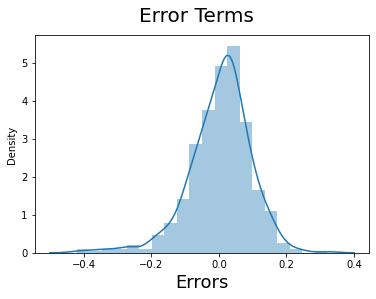

In [901]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [902]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [903]:
X_test_m10 = sm.add_constant(X_test)
X_test_m10 = X_test_m10[X_train_lm10.columns]
y_pred_m10 = lr_rfe10.predict(X_test_m10)

Text(0, 0.5, 'y_pred')

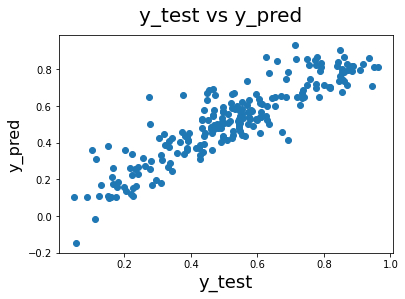

In [904]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m10)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [905]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred_m10)
r_squared

0.7932664437970807

#### Adjusted r2 score

In [906]:
adj_r2score = 1-(1-r_squared)*(df_test.shape[0]-1)/(df_test.shape[0]-9-1)
adj_r2score

0.7843640418553282

### The equation of best fitted based on our final model

cnt = (0.2382*yr) + (0.0768*workingday) + (0.6006*temp) - (0.0988*windspeed) + (0.0902*season_summer) + (0.1467*season_winter) + (0.0969*mnth_Sep) + (0.0883*weekday_Sat) - (0.2896*weathersit_Light) - (0.0744*weathersit_Mist)
